# Regresión Logística

In [264]:
import pandas as pd
import numpy as np

In [265]:
df = pd.read_csv("Variables_entrevista.csv")

In [266]:
df.head()

,ID_Credito,Modelo,Monto_prestamo,EntidadFederativa,ActividadEconomica,FLG_Empleo,IngresoMensual,Propiedad_Casa,Default_Crediticio
0,2305109,MARCH,159003.0,JALISCO,TAXISTA,0,0.0,NaN,1
1,2306039,SENTRA,275400.0,JALISCO,TAXISTA,0,0.0,NaN,1
2,2310004,MARCH,196001.0,JALISCO,TAXISTA,0,0.0,NaN,1
3,2323061,MARCH,162802.0,SINALOA,TAXISTA,0,0.0,NaN,1
4,2340054,NP300,278300.0,SINALOA,TAXISTA,0,0.0,NaN,1


In [267]:
np.average(df.Default_Crediticio)
#14% de las personas caerán en mora

0.14212034383954156

### One-hot

In [268]:
# Lista de columnas categóricas a codificar
columnas_categoricas = ['Modelo', 'EntidadFederativa', 'ActividadEconomica', 'Propiedad_Casa']
data_encoded = pd.get_dummies(df, columns=columnas_categoricas)
df = data_encoded.drop(['ID_Credito'], axis=1)
default_crediticio = df.pop('Default_Crediticio')
df['Default_Crediticio'] = default_crediticio # insertar Default_crediticio al final del df
df

,Monto_prestamo,FLG_Empleo,IngresoMensual,Modelo_ALTIMA,Modelo_KICKS,Modelo_MARCH,Modelo_MAXIMA,Modelo_MURANO,Modelo_NOTE,Modelo_NP300,...,ActividadEconomica_JUBILADO(A),ActividadEconomica_NEGOCIO PROPIO,ActividadEconomica_OTROS,ActividadEconomica_SIN DATO,ActividadEconomica_TAXISTA,Propiedad_Casa_FAMILIA O PADRES,Propiedad_Casa_PROPIA (PAGANDO),Propiedad_Casa_PROPIETARIO,Propiedad_Casa_RENTADA,Default_Crediticio
0,159003.0,0,0.0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
1,275400.0,0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
2,196001.0,0,0.0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
3,162802.0,0,0.0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
4,278300.0,0,0.0,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13955,266201.0,0,23857.0,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,0
13956,220212.0,0,25144.0,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,0
13957,179901.0,0,25.0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,0
13958,217601.0,0,30000.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,0


### Histogramas 

array([[<Axes: title={'center': 'Monto_prestamo'}>,
        <Axes: title={'center': 'FLG_Empleo'}>],
       [<Axes: title={'center': 'IngresoMensual'}>, <Axes: >]],
      dtype=object)

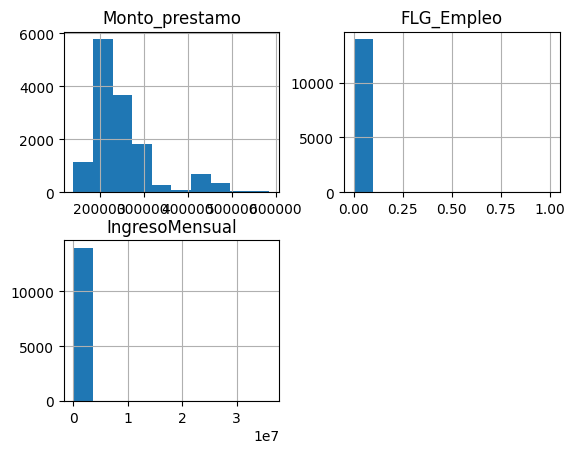

In [269]:
# Eliminar la columna 'Default_Crediticio'
df_without_target = df.drop('Default_Crediticio', axis=1)

# Generar histogramas para las columnas restantes
df_without_target.hist()

In [270]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(x)
print(y)

[[159003.0 0 0.0 ... False False False]
 [275400.0 0 0.0 ... False False False]
 [196001.0 0 0.0 ... False False False]
 ...
 [179901.0 0 25.0 ... False True False]
 [217601.0 0 30000.0 ... False True False]
 [206200.0 0 26768.0 ... False True False]]
[1 1 1 ... 0 0 0]


In [271]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0) # 25% datos para test

### Escalado de variables

In [272]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos de entrada X
standar_x = StandardScaler()
x_train = standar_x.fit_transform(x_train)
x_test = standar_x.fit_transform(x_test)

### Análisis exploratorio con datos categóricos

### Entrenar el modelo de RL

In [273]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=0, solver='lbfgs')
reg.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [274]:
y_pred = reg.predict(x_test)
y_pred, y_test

print(reg.score(x_test, y_test))

0.8659025787965616


### Evaluar

In [290]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
report = classification_report(y_test, y_pred)
print(report)

[[3012    3]
 [ 465   10]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3015
           1       0.77      0.02      0.04       475

    accuracy                           0.87      3490
   macro avg       0.82      0.51      0.48      3490
weighted avg       0.85      0.87      0.81      3490



### Coeficientes

In [276]:
coeficients = reg.coef_[0]
# print(coeficients) # (Monto_prestamo, FLG_Empleo, IngresoMensual)
feature_names = df.columns.tolist()
feature_names.pop() # quitar Default_Crediticio

print(feature_names)

['Monto_prestamo', 'FLG_Empleo', 'IngresoMensual', 'Modelo_ALTIMA', 'Modelo_KICKS', 'Modelo_MARCH', 'Modelo_MAXIMA', 'Modelo_MURANO', 'Modelo_NOTE', 'Modelo_NP300', 'Modelo_OTROS', 'Modelo_PATHFINDER', 'Modelo_SENTRA', 'Modelo_TIIDA', 'Modelo_URVAN', 'Modelo_VERSA', 'Modelo_XTRAIL', 'EntidadFederativa_AGUASCALIENTES.', 'EntidadFederativa_BAJA CALIFORNIA NORTE', 'EntidadFederativa_BAJA CALIFORNIA SUR', 'EntidadFederativa_CAMPECHE', 'EntidadFederativa_CHIAPAS', 'EntidadFederativa_CHIHUAHUA', 'EntidadFederativa_CIUDAD DE MEXICO', 'EntidadFederativa_COAHUILA', 'EntidadFederativa_COLIMA', 'EntidadFederativa_DURANGO', 'EntidadFederativa_ESTADO DE MEXICO', 'EntidadFederativa_GUANAJUATO', 'EntidadFederativa_GUERRERO', 'EntidadFederativa_HIDALGO', 'EntidadFederativa_JALISCO', 'EntidadFederativa_MICHOACAN', 'EntidadFederativa_MORELOS', 'EntidadFederativa_NAYARIT', 'EntidadFederativa_NUEVO LEON', 'EntidadFederativa_OAXACA', 'EntidadFederativa_PUEBLA', 'EntidadFederativa_QUERETARO', 'EntidadFedera

In [277]:
# Interpretar los coeficientes
for coef, feature in zip(coeficients, feature_names):
    print(f'{feature}: {coef}')

Monto_prestamo: 0.373382506472006
FLG_Empleo: 0.0
IngresoMensual: -1.193137786017626
Modelo_ALTIMA: -0.1402258600973685
Modelo_KICKS: -0.06517297756680682
Modelo_MARCH: 0.1764921769523775
Modelo_MAXIMA: -0.0640968352796738
Modelo_MURANO: 0.0
Modelo_NOTE: -0.03375939617159549
Modelo_NP300: -0.013634895203585193
Modelo_OTROS: -0.0057136992252230226
Modelo_PATHFINDER: -0.05973257122528302
Modelo_SENTRA: -0.021770107674705986
Modelo_TIIDA: 0.02752478135046332
Modelo_URVAN: -0.254013034968831
Modelo_VERSA: 0.016803337631593876
Modelo_XTRAIL: -0.06597569045186616
EntidadFederativa_AGUASCALIENTES.: 0.006092774769083275
EntidadFederativa_BAJA CALIFORNIA NORTE: -0.007376278005665146
EntidadFederativa_BAJA CALIFORNIA SUR: -0.014849363687959178
EntidadFederativa_CAMPECHE: -0.053015988474613314
EntidadFederativa_CHIAPAS: 0.049596304286029486
EntidadFederativa_CHIHUAHUA: 0.020868560866536077
EntidadFederativa_CIUDAD DE MEXICO: -0.09667086357764242
EntidadFederativa_COAHUILA: 0.025515680999201137
En

In [287]:
import csv

archivo_salida = 'coefs.csv'

# Abrir el archivo CSV en modo escritura
with open(archivo_salida, 'w', newline='') as archivo_csv:
    writer = csv.writer(archivo_csv)

    # Escribir encabezados
    writer.writerow(['Feature', 'Coeficient'])

    # Escribir los datos
    for coef, feature in zip(coeficients, feature_names):
        writer.writerow([feature, coef])

print(f"Los coeficientes se han guardado exitosamente en el archivo '{archivo_salida}'.")

Los coeficientes se han guardado exitosamente en el archivo 'coefs.csv'.


In [289]:
# Crear un DataFrame con los coeficientes e nombres de características
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeficients})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

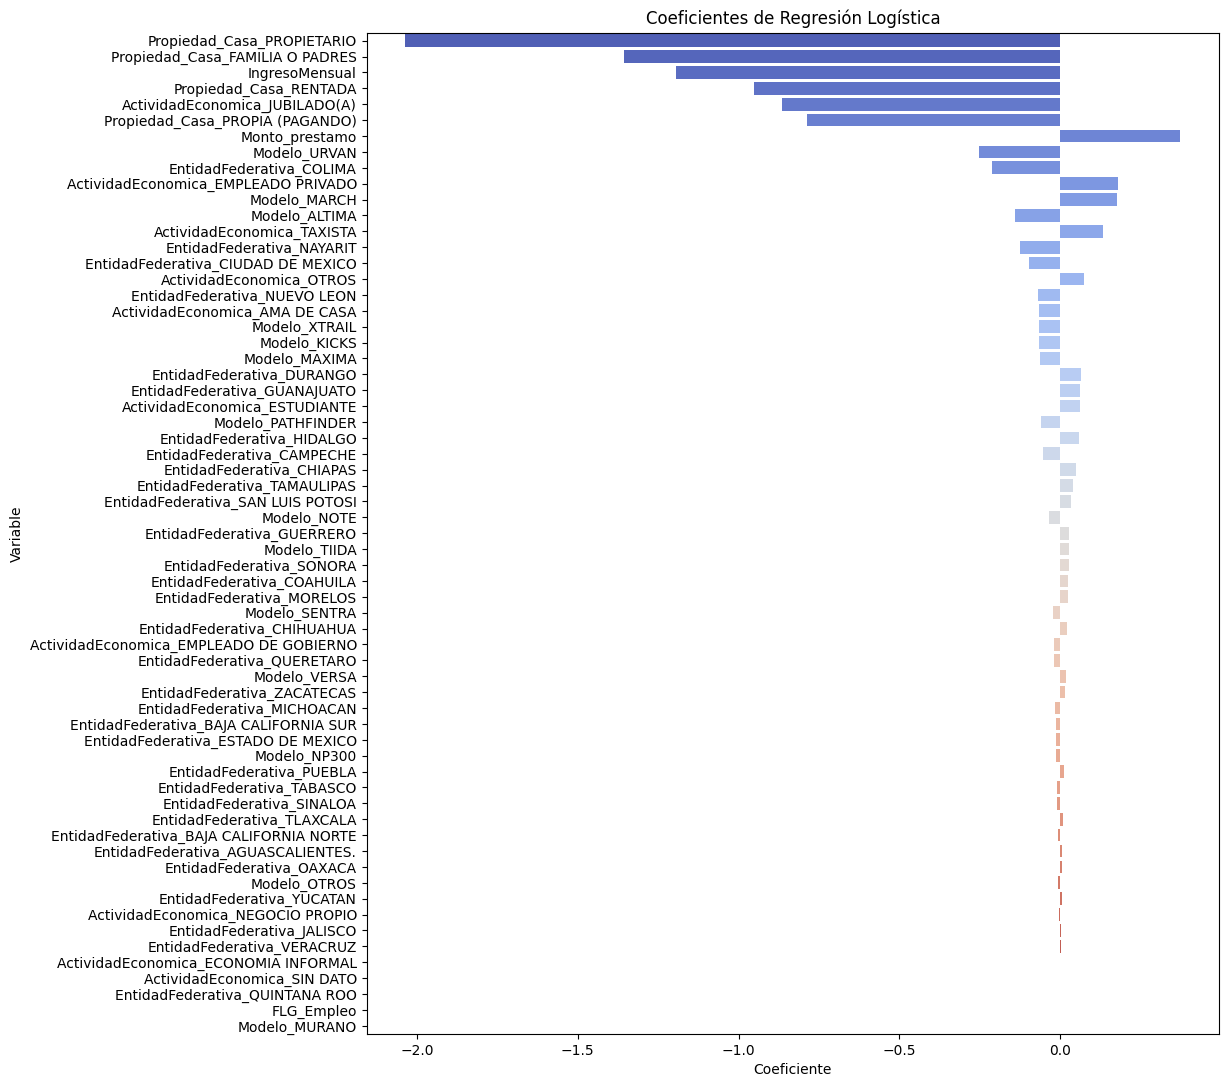

In [279]:
# Graficar los coeficientes
plt.figure(figsize=(11, 13))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Coeficientes de Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.show()

### Análisis exploratorio de datos

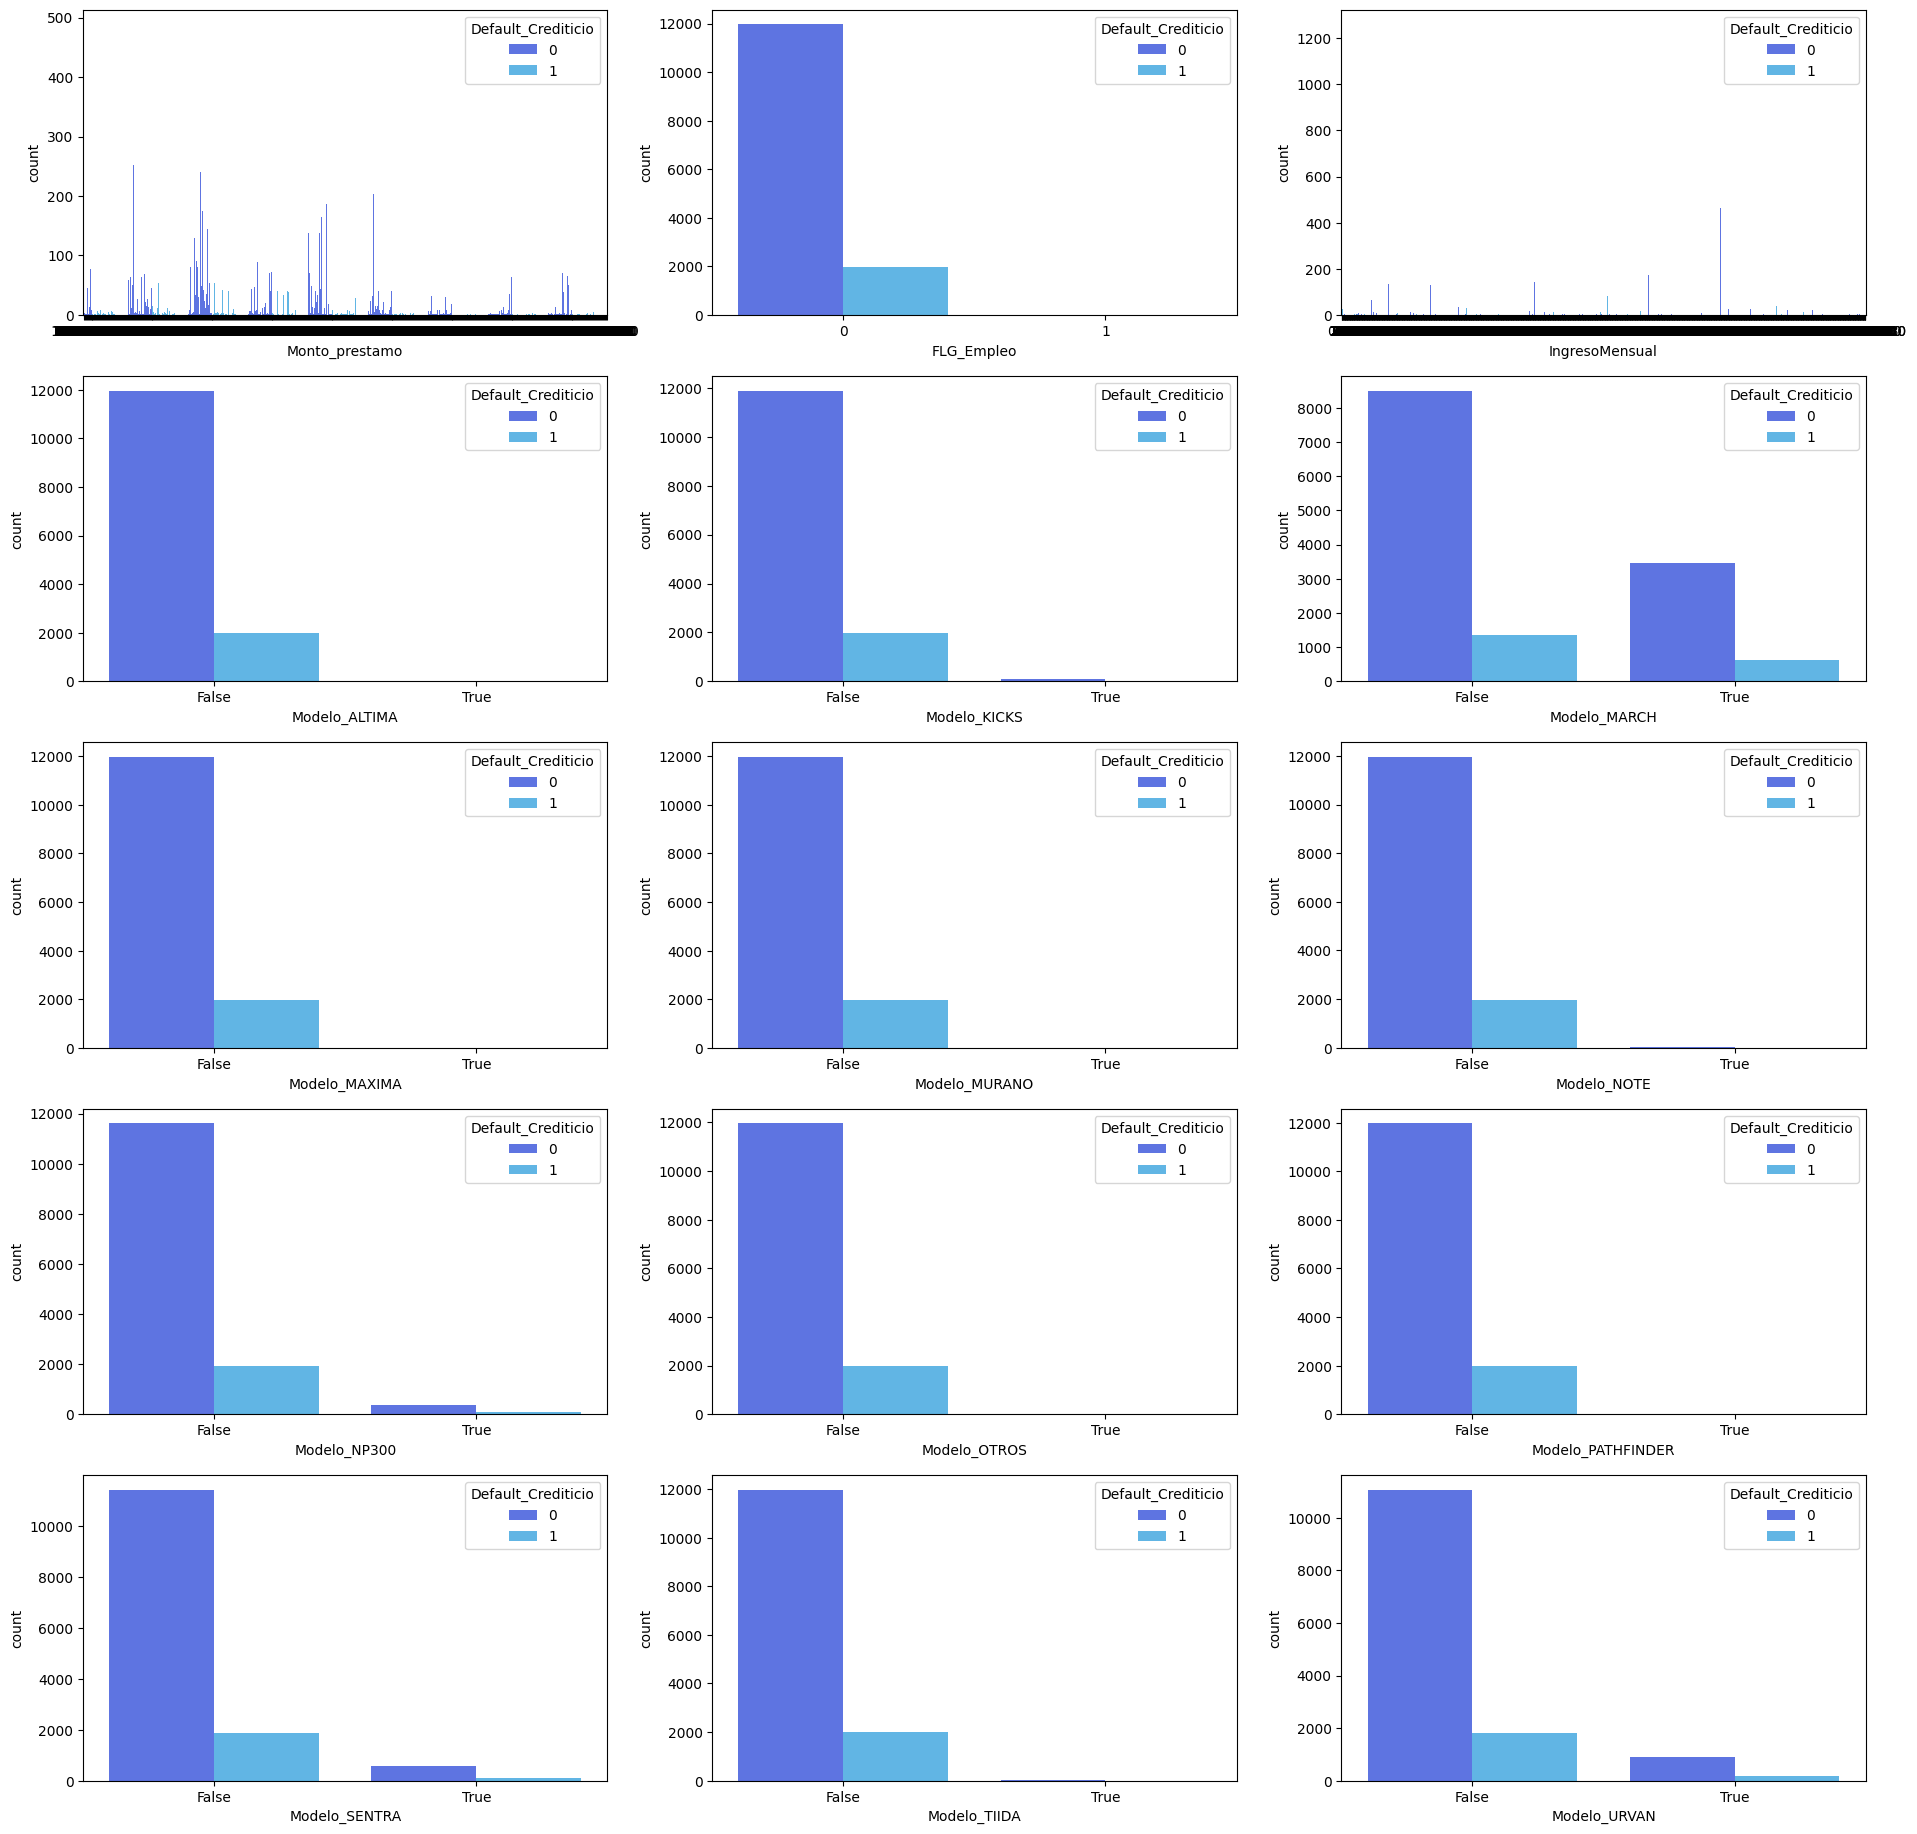

In [280]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(23, 23))
colors = ["#4866F7", "#4BBBFA"]
for var, ax in zip(feature_names, axs.flatten()):
    sns.countplot(data=df, x=var,hue='Default_Crediticio', ax=ax,  palette=colors)

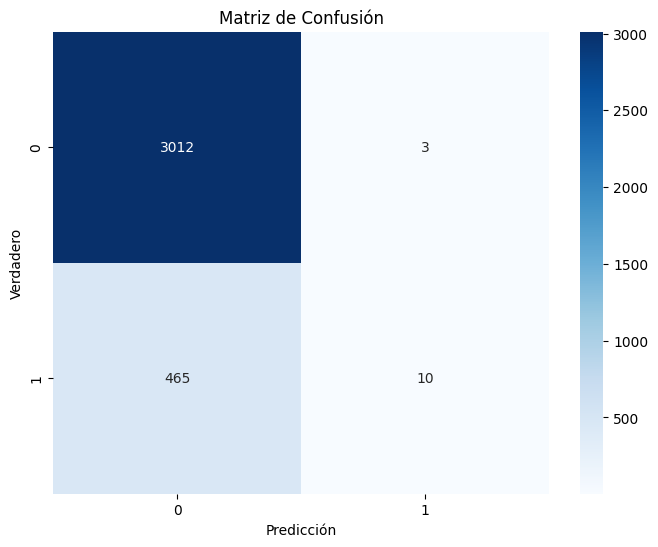

In [286]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

10470 10470 1 1


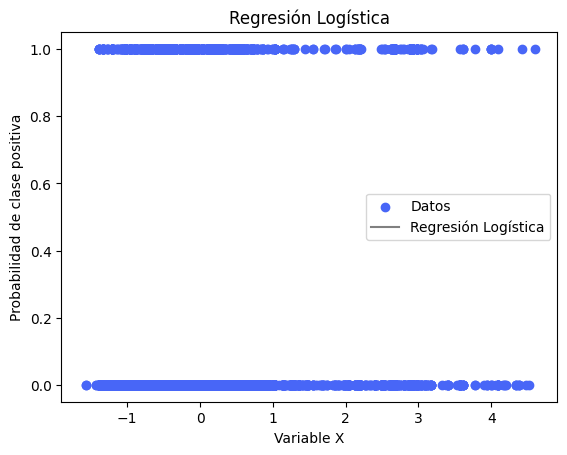

In [282]:
print(len(x_train), len(y_train), len(X_plot), len(y_proba))

# Graficar los datos y la regresión logística
plt.scatter(x_train[:, 0], y_train, color='#4866F7', label='Datos')
# print(X_plot)
plt.plot(X_plot[:, 0], y_proba, color='gray', label='Regresión Logística')
# plt.plot(X_plot[:, 1], y_proba, color = "gray", label='Regresión Logística')

plt.title('Regresión Logística')
plt.xlabel('Variable X')
plt.ylabel('Probabilidad de clase positiva')

plt.legend()

plt.show()